In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

#  выбор темы картинок на Ваш вкус. Необязательная строчка.
#  matplotlib.style.use('ggplot')
#  Эта строчка нужна для того, чтобы картинки отображались в ячейках
%matplotlib inline


In [2]:
import random


Text(2.05, 0.9, 'H')

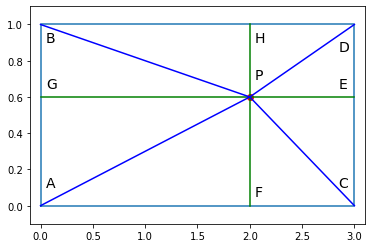

In [26]:
#  Пример расположения точки
x =  np.array([2.0])
y =  np.array([0.6])


#  Вершины прямоугольника
Rx = [0.0, 0.0, 3.0, 3.0, 0.0]
Ry = [0.0, 1.0, 1.0, 0.0, 0.0]
plt.axis([-0.1, 3.1, -0.1, 1.1])
plt.plot(Rx, Ry)

plt.plot(x, y, 'ro')

plt.plot([0.0, 3.0], [0.6, 0.6], 'g')
plt.plot([2.0, 2.0], [0.0, 1.0], 'g')


plt.plot(np.append(x, 3.0), np.append(y, 1.0), 'b')
plt.plot(np.append(x, 3.0), np.append(y, 0.0), 'b')
plt.plot(np.append(x, 0.0), np.append(y, 1.0), 'b')
plt.plot(np.append(x, 0.0), np.append(y, 0.0), 'b')

plt.text(x = x+0.05, y = y +0.1, s = "P", fontsize=14)

plt.text(x = 0.05, y = 0.1, s = "A", fontsize=14)
plt.text(x = 0.05, y = 0.9, s = "B", fontsize=14)
plt.text(x = 2.85, y = 0.1, s = "C", fontsize=14)
plt.text(x = 2.85, y = 0.85, s = "D", fontsize=14)

plt.text(x = 2.85, y = 0.65, s = "E", fontsize=14)
plt.text(x = 2.05, y = 0.05, s = "F", fontsize=14)
plt.text(x = 0.05, y = 0.65, s = "G", fontsize=14)
plt.text(x = 2.05, y = 0.90, s = "H", fontsize=14)



In [31]:
#  Нахожу четыре угла в прямоугольнике
#  phi_1[DPE, BPG, GPA, EPC]

phi_1 = np.arctan(np.array([(1.0 - y[0])/(3.0 - x[0]), 
                           (1.0 - y[0])/x[0], 
                           y[0]/x[0], 
                           y[0]/(3.0 - x[0])]))



In [32]:

# Число экспериментов
n_exp = 10000


#  Задаем зерно датчика a 
#  version=2 требует преобразовать а в целое число, если требуется
random.seed(a=12345, version=2)

#  промежуточное значение среднего расстояния
mean_tmp = 0


for i in range(n_exp):   

    x = np.random.uniform(0.0, 3.0, 1)    
    y = np.random.uniform(0.0, 1.0, 1)    
    phi_0 = np.random.uniform(0.0, 2*np.pi, 1)    
       
    if             0 < phi_0[0] <= phi_1[0]:         # выходит на ED
        dist = (3-x) / np.cos(phi_0[0])

    elif  phi_1[0] < phi_0[0] <= np.pi/2:            # выходит на DH
        dist = (1-y) / np.cos(np.pi/2 - phi_0[0])

    elif np.pi/2 <= phi_0[0] <= np.pi - phi_1[1]:     # выходит на HB
        dist = (1-y) / np.cos(phi_0[0] - np.pi/2)

    elif np.pi - phi_1[1] < phi_0[0] <= np.pi:         # выходит на BG
        dist = x / np.cos(np.pi - phi_0[0])

    elif np.pi < phi_0[0] <= np.pi + phi_1[2]:         # выходит на GA
        dist = x / np.cos(phi_0[0] - np.pi)

    elif np.pi + phi_1[2] < phi_0[0] <= np.pi*3/2:      # выходит на AF
        dist = y / np.cos(np.pi*3/2 - phi_0[0])

    elif np.pi*3/2 < phi_0[0] <= 2*np.pi - phi_1[3]:    # выходит на FC
        dist = y / np.cos(phi_0[0] - np.pi*3/2)

    else:                                               # выходит на CE
        dist = (3-x) / np.cos(2*np.pi - phi_0[0])

    mean_tmp =  (mean_tmp * i + dist) / (i+1)   # среднее арифметическое

print('Ожидаемое расстояние равно ', mean_tmp)



[1.17170641]
